In [ ]:
import re

In [ ]:
# 텍스트 앞에서 apple 찾기
re.findall(r'apple', "I have an apple but you don't have apple")

['apple', 'apple']

In [ ]:
# 텍스트에 영문자 't가 몇 번 나오는지 알아보기 
re.findall(r't', "I have an apple but you don't have apple")

['t', 't']

In [ ]:
# .은 1개의 문자
print(re.findall(r'a.c', 'abc auc axxc'))

# ?은 앞의 문자가 0 or 1개
print(re.findall(r'ab?c', 'ac abc auc axxc'))

# *은 앞의 문자가 0번 이상 발생
print(re.findall(r'ax*c', 'ac abc auc axxc'))

# +은 앞의 문자가 1번 이상 발생
print(re.findall(r'ax+c', 'ac abc auc axxc'))

['abc', 'auc']
['ac', 'abc']
['ac', 'axxc']
['axxc']


In [ ]:
# 1과 3 사이에 1개의 문자가 나오는 경우의 수
print(re.findall(r'1.3', '13 123 143 193 1993 1423 1ab3'))

# 1과 3 사이에 1개 이상의 9가 나오는경우의 수 (9이외의 다른 문자는 불가)
print(re.findall(r'19+3','13 123 143 193 1993 1423 1ab3'))

['123', '143', '193']
['193', '1993']


In [ ]:
## 18p
# a와 c 사이에 0 또는 2가 나오는 경우 수
print(re.findall(r'a[02]c', 'ac a0c a1c a7c abc'))

# a와 c 사이에 숫자가 나오는 경우의 수
print(re.findall(r'a[0-9]c', 'ac a0c a1c a7c abc'))

['a0c']
['a0c', 'a1c', 'a7c']


In [ ]:
##19p
# 메타문자
re.findall(r'"[^"]*"', '"aa" bb cc "dd"')   # "" 안에 있는 문자를 가져와보자

['"aa"', '"dd"']

In [ ]:
re.findall(r'"([^"]*)"', '"aa" bb cc "dd"') 

['aa', 'dd']

In [ ]:
## 23p
#[와 ] 사이에 있는 문자들을 추출해보자

re.findall(r'\[([^\[\]]*)\]', '"Two books, [Harry Potter] and [Load of the Rings] are popular worldwide."')

['Harry Potter', 'Load of the Rings']

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
text = "Text messaging, or texting, is the act of composing and sending brief, electronic messages between two or more mobile phones, or fixed or portable devices over a phone network."
print(text)

Text messaging, or texting, is the act of composing and sending brief, electronic messages between two or more mobile phones, or fixed or portable devices over a phone network.


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## 34p

import nltk
from nltk.corpus import stopwords
import re
stopwords_en = stopwords.words('english')

text = "Big data is a field that treats ways to analyze, systematically extract information from, or otherwise deal with data sets that are too large or complex to be dealt with by traditional data-processing application software."
print(text)

text = text.lower()  #소문자
tokens = nltk.word_tokenize(text)  #토큰화
lemmatizer = nltk.stem.WordNetLemmatizer()    #표제어 추출
tokens = [lemmatizer.lemmatize(t) for t in tokens]   
tokens = [t for t in tokens if t not in stopwords_en]    # 불용어 제거
tokens = [t for t in tokens if re.fullmatch('[a-z_-]+', t)]     # 정규표현식 : 소문자랑 _랑 -만 고려함
print(tokens)

Big data is a field that treats ways to analyze, systematically extract information from, or otherwise deal with data sets that are too large or complex to be dealt with by traditional data-processing application software.
['big', 'data', 'field', 'treat', 'way', 'analyze', 'systematically', 'extract', 'information', 'otherwise', 'deal', 'data', 'set', 'large', 'complex', 'dealt', 'traditional', 'data-processing', 'application', 'software']


In [ ]:
## 36p
#표제어 추출을 어간추출로 대체함

import nltk
from nltk.corpus import stopwords
import re
stopwords_en = stopwords.words('english')

text = "Text messaging, or texting, is the act of composing and sending brief, electronic messages between two or more mobile phones, or fixed or portable devices over a phone network."
print(text)

text = text.lower()
tokens = nltk.word_tokenize(text)
porter = nltk.PorterStemmer()                             # 표제어 추출 대신 어간 추출 사용
tokens = [porter.stem(t) for t in tokens]                 # 표제어 추출 대신 어간 추출 사용
tokens = [t for t in tokens if t not in stopwords_en]
tokens = [t for t in tokens if re.fullmatch('[a-z_]+', t)]
print(tokens)

Text messaging, or texting, is the act of composing and sending brief, electronic messages between two or more mobile phones, or fixed or portable devices over a phone network.
['text', 'messag', 'text', 'act', 'compos', 'send', 'brief', 'electron', 'messag', 'two', 'mobil', 'phone', 'fix', 'portabl', 'devic', 'phone', 'network']


# **한국어**

In [ ]:
# !pip install konlpy

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran()
text = '하지만 빅데이터의 문제점은 바로 사생활 침해와 보안 측면에 자리하고 있다.'
komoran.pos(text)

[('하지만', 'MAJ'),
 ('빅', 'NNG'),
 ('데이터', 'NNG'),
 ('의', 'JKG'),
 ('문제점', 'NNG'),
 ('은', 'JX'),
 ('바로', 'MAG'),
 ('사생활 침해', 'NNP'),
 ('와', 'JC'),
 ('보안', 'NNP'),
 ('측면', 'NNG'),
 ('에', 'JKB'),
 ('자리', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('있', 'VX'),
 ('다', 'EF'),
 ('.', 'SF')]

In [ ]:
komoran.nouns(text)

['빅', '데이터', '문제점', '사생활 침해', '보안', '측면', '자리']

# 워드 클라우드

In [ ]:
# !pip install wordcloud

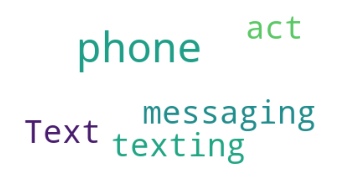

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = "Text messaging, or texting, is the act of composing and sending brief, electronic messages between two or more mobile phones, or fixed or portable devices over a phone network."

wc = WordCloud(background_color="white", max_font_size=50, max_words=5).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text messaging, or texting, is the act of composing and sending brief, electronic messages between two or more mobile phones, or fixed or portable devices over a phone network.
['text', 'messaging', 'texting', 'act', 'composing', 'sending', 'brief', 'electronic', 'message', 'two', 'mobile', 'phone', 'fixed', 'portable', 'device', 'phone', 'network']


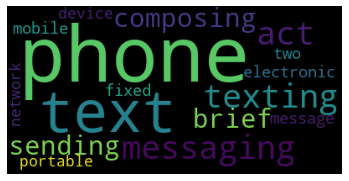

In [ ]:
# 전처리 후 워드클라우드 만들기

import nltk
from nltk.corpus import stopwords
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopwords_en = stopwords.words('english')

text = "Text messaging, or texting, is the act of composing and sending brief, electronic messages between two or more mobile phones, or fixed or portable devices over a phone network."
print(text)

text = text.lower()  #소문자
tokens = nltk.word_tokenize(text)  #토큰화
lemmatizer = nltk.stem.WordNetLemmatizer()    #표제어 추출
tokens = [lemmatizer.lemmatize(t) for t in tokens]   
tokens = [t for t in tokens if t not in stopwords_en]    # 불용어 제거
tokens = [t for t in tokens if re.fullmatch('[a-z_-]+', t)]     # 정규표현식 : 소문자랑 _랑 -만 고려함
print(tokens)

wc = WordCloud().generate(' '.join(tokens))
plt.imshow(wc)
plt.axis("off")
plt.show()

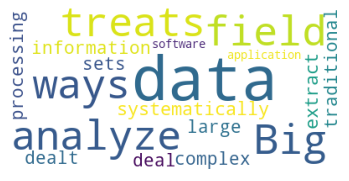

In [ ]:
text = "Big data is a field that treats ways to analyze, systematically extract information from, or otherwise deal with data sets that are too large or complex to be dealt with by traditional data-processing application software."
wc = WordCloud(background_color="white").generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
!apt install fonts-nanum
!ls /usr/share/fonts/truetype/nanum/

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
NanumBarunGothicBold.ttf  NanumMyeongjoBold.ttf  NanumSquareRoundR.ttf
NanumBarunGothic.ttf	  NanumMyeongjo.ttf	 NanumSquareR.ttf
NanumGothicBold.ttf	  NanumSquareB.ttf
NanumGothic.ttf		  NanumSquareRoundB.ttf


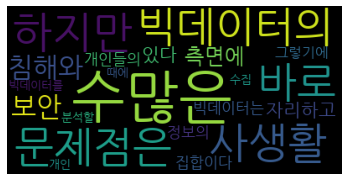

In [ ]:
text = "하지만 빅데이터의 문제점은 바로 사생활 침해와 보안 측면에 자리하고 있다. 빅데이터는 수많은 개인들의 수많은 정보의 집합이다. 그렇기에 빅데이터를 수집, 분석할 때에 개인"

# 한국어 전처리
from konlpy.tag import Komoran
komoran = Komoran()
nouns = komoran.nouns(text)


# 워드클라우드
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()

# 문서단어행렬

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

documents = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

count_vectorizer = CountVectorizer()
feat_vect = count_vectorizer.fit_transform(documents)
feature_names = count_vectorizer.get_feature_names_out()
print('단어 목록:', feature_names)
print('문서단어행렬 모양 (문서의 수, 단어의 수):', feat_vect.shape)
print(feat_vect.toarray())

단어 목록: ['과일이' '길고' '노란' '먹고' '바나나' '사과' '싶은' '저는' '좋아요']
문서단어행렬 모양 (문서의 수, 단어의 수): (4, 9)
[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]


# 토픽 모델링(한국어)

In [ ]:
## 76p

# 모듈 불러오기
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
!pip install konlpy 
from konlpy.tag import Komoran


# 문서 만들기: 축구와 강아지 관련 문서를 3개씩, 총 6개 문서
documents = ['축구 선수들과 감독들은 경기에서 이기기 위해 다양한 전술과 기술을 꾸준히 개발해 왔다. 비록 축구가 상대편보다 더 많은 득점을 올리는 것이 승리 요건인 단순한 규칙을 기반으로 시작된 스포츠이지만, 단체 종목인 축구의 특성 상 선수 개개인의 기량을 극대화하여 보다 탄탄한 전술로 잘 조직된 팀이 승리할 가능성이 더 크다. 여러 팀 전술과 개인 기술의 발전은 축구를 단순한 공놀이가 아닌, 보다 흥미롭고 세련된 스포츠로 만드는 데 기여하고 있다.',
            '축구는 경기 규칙에 따라 진행된다. 축구 양 팀 선수 열한 명이 상대 팀의 골대 안으로 축구공을 넣어 득점을 올리기 위해 경쟁하는 경기이다. 공은 단 한 개만 사용되며, 주전 선수가 부상이나 기타 여러 사유로 더 이상 경기를 진행할 수 없을 때를 대비해 후보 선수 열세 명을 따로 두기 때문에 한 팀당 선수 구성은 스물네 명이 된다. 경기가 종료됐을 때 더 많은 득점을 올린 팀이 승리하며, 양 팀이 동점일 경우는 무승부가 된다.',
            '오늘날 축구는 프로축구의 형태로 세계 곳곳에서 이루어지고 있다. 수백만에 달하는 사람들이 정기적으로 축구 경기장을 찾으며 자신이 좋아하는 팀을 응원하고, 수십억의 인구가 텔레비전으로 축구를 시청한다. 수많은 사람 또한 아마추어 레벨에서 축구를 즐기는 것으로 알려졌다. 2001년 국제 축구 연맹이 주관한 조사에 따르면, 2억 4천 명 이상의 인구가 200여 국가에 걸쳐 정기적으로 축구를 하는 것으로 나타났다. 축구의 간단한 규칙과 적은 경기 필수품이 축구의 확산과 대중화에 기여했음은 두말 할 것도 없다.',
            '태어난 강아지는 생후 10일까지를 출생견으로 본다. 강아지는 견종에 따라 체중이 매우 다양하며 태어난 지 14일 무렵 눈을 뜨고 소리에 반응하며 걷기 시작한다. 몸떨기 반사는 그보다 1주일 정도 빠르다. 젖 빨기는 첫 2주간은 2시간마다 이루어지며 8일 만에 몸무게가 약 두 배로 늘어나는 등 빠르게 성장한다. 이 기간엔 따로 마련한 출산장에서 강아지의 관리를 전적으로 어미개에게 맡기는 것이 좋다. 강아지가 자신의 몸을 부들부들 떠는 몸떨기 반사는 체온을 유지하기 위한 자연스러운 반응이다. 강아지는 생후 3주에서 3개월에 걸쳐 한 배에서 나온 강아지들과 어미, 사람들과 사회적 관계를 맺는 이행기를 거친다.',
            '이 시기 강아지들에겐 나중에 어미나 같이 태어난 강아지와 떨어져 홀로 살아갈 앞날을 위해 다른 동물들과 마주치는 훈련등 사회화가 필요하다. 이행기의 강아지는 호기심이 왕성하여 바닥에 떨어진 것은 전기 코드나 작은 물건을 가리지 않고 물어뜯기 때문에 안전에 주의하여야 한다.',
            '개는 매우 강한 사회성을 보이는 동물이며 강아지는 어미나 자신들끼리 노는 데 대부분의 시간을 보낸다. 사람과의 사회적 관계를 맺는 것은 8주에서 12주 무렵부터 이루어지' ]

# 문서 전처리하기
komoran = Komoran()
documents_preprocessed = [' '.join(komoran.nouns(text)) for text in documents]
print(documents_preprocessed)


# 문서단어행렬 만들기
count_vectorizer = CountVectorizer(min_df=2)   # 2개 이상의 문서에서 출현한 단어만 고려
feat_vect = count_vectorizer.fit_transform(documents_preprocessed)
feature_names = count_vectorizer.get_feature_names_out()
print('단어 목록:', feature_names)
print('문서단어행렬 모양 (문서의 수, 단어의 수):', feat_vect.shape)
print(feat_vect.toarray())

# 토픽모델 (LDA) 적용
lda = LatentDirichletAllocation(n_components=2)  # 토픽 수는 2개로 설정
lda.fit(feat_vect)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
['축구 선수 감독 경기 전술 기술 개발 축구 상대편 득점 것 승리 요건 규칙 기반 시작 스포츠 단체 종목 축구 특성 상 선수 개개인 기량 극대 전술 조직 팀 승리 팀 전술 개인 기술 발전 축구 공놀이 흥미 스포츠 데 기여', '축구 경기 규칙 진행 축구 팀 선수 열 명 상대 팀 골대 안 축구공 득점 경쟁 경기 공 개 사용 주전 선수 부상 기타 사유 이상 경기 진행 수 때 대비 후보 선수 열세 명 두기 때문 팀 선수 구성은 명 경기 종료 때 득점 팀 승리 팀 동점 경우 무승부', '오늘날 축구 프로 축구 형태 세계 곳곳 사람 정기 축구 경기장 자신 팀 응원 인구 텔레비전 축구 시청 사람 아마추어 레벨 축구 것 년 국제 축구 연맹 주관 조사 명 이상 인구 국가 정기 축구 것 축구 규칙 경기 필수품 축구 확산 대중 기여 두말 것', '강아지 생후 일 출생 견 강아지 견 종 체중 지 일 무렵 눈 소리 반응 걷기 시작 몸 떨기 반사 주일 정도 젖 주간 시간 일 만 몸무게 배로 등 성장 기간 마련 출산 장 강아지 관리 전적 어미 개 것 강아지 자신 몸 몸 떨기 반사 체온 유지 자연 반응 강아지 생후 주 개월 배 강아지 어미 사람 사회 관계 이행기', '시기 강아지 나중 어미 강아지 앞날 동물 훈련 등 사회화 필요 이행기 강아지 호기심 바닥 것 전기 코드 물건 때문 안전 주의', '개 사회 동물 강아지 어미 자신 데 대부분 시간 사람과 사회 관계 것 주 주 무렵']
단어 목록: ['강아지' '경기' '관계' '규칙' '기여' '동물' '득점' '때문' '무렵' '사람' '사회' '선수' '승리' '시간'
 '시작' '어미' '이상' '이행기' '자신' '축구']
문서단어행렬 모양 (문서의 수, 단어의 수): (6, 20)
[[0 1 0 1 1 0 1 0 0 0 0 2 2 0 1 0 0 0 0 4]

LatentDirichletAllocation(n_components=2)

In [ ]:
topic_word_dist = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]    # 토픽별 단어분포
doc_topic_dist = lda.transform(feat_vect)                                         # 문서별 토픽분포

In [ ]:
topic_word_dist[1,:]  # 토픽 2의 단어 분포|

array([0.00912309, 0.11819951, 0.00912075, 0.06362802, 0.04543629,
       0.00913255, 0.0636295 , 0.02736534, 0.00912075, 0.04547905,
       0.00912299, 0.1181989 , 0.06362678, 0.00912075, 0.02713623,
       0.00912373, 0.04544034, 0.00912627, 0.02696388, 0.28190529])

In [ ]:
doc_topic_dist[0,:]  # 첫번째 문서의 토픽 분포

array([0.03724861, 0.96275139])

In [ ]:
# 토픽별로 중요 단어들 출력
n_top_words = 5    # 중요 단어 5개
for i, topic_dist in enumerate(topic_word_dist):
    sorted_topic_dist = np.argsort(topic_dist)
    topic_words = np.array(feature_names)[sorted_topic_dist]
    topic_words = topic_words[:-n_top_words-1:-1]
    print("Topic", str(i+1), topic_words)

Topic 1 ['강아지' '어미' '사회' '자신' '관계']
Topic 2 ['축구' '경기' '선수' '득점' '규칙']


In [ ]:
# 한글 폰트를 출력하기 위해 아래 코드를 실행 후 [런타임] - [런타임 다시 시작] 필요!!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

Topic 2 ['축구' '경기' '선수' '득점' '규칙']


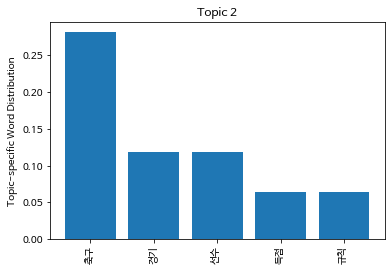

In [ ]:
# 토픽별 단어분포
i = 1    # 토픽 인덱스 (인덱스는 0부터 시작함에 유의, 토픽 1: i=0)
topic_dist = topic_word_dist[i,:]
sorted_topic_dist = np.argsort(topic_dist)
topic_words = np.array(feature_names)[sorted_topic_dist]
topic_words = topic_words[:-n_top_words-1:-1]
print("Topic", str(i+1), topic_words)
plt.bar(topic_words, topic_word_dist[i,sorted_topic_dist][:-n_top_words-1:-1])
plt.xticks(rotation=90)
plt.title("Topic " + str(i+1))
plt.ylabel("Topic-specific Word Distribution")
plt.show()

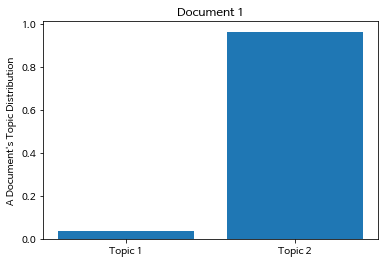

In [ ]:
# 문서별 토픽분포
j = 0    # 문서 인덱스 (인덱스는 0부터 시작함에 유의, 첫번째 문서: j=0)
plt.title("Document " + str(j+1))
plt.bar(['Topic 1', 'Topic 2'], doc_topic_dist[j,:])
plt.ylabel("A Document's Topic Distribution")
plt.show()

# 토픽모델링(영어)

In [ ]:
## 60p

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
stopwords_en = stopwords.words('english')


# 문서 5개
documents = ['I want to watch a movie this weekend.',
             'I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.',
             'I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.',
             'Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been so long!',
             'This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books helped to learn so much about how our thou']


def eng_preprocessing(text):     # 영어 텍스트 전처리하는 과정을 함수로 만듦
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords_en]
    tokens = [t for t in tokens if re.fullmatch('[a-z_-]+', t)]
    return ' '.join(tokens)

# 문서 전처리하기
documents_preprocessed = [eng_preprocessing(text) for text in documents]
print(documents_preprocessed)


# 문서단어행렬 만들기
count_vectorizer = CountVectorizer() 
feat_vect = count_vectorizer.fit_transform(documents_preprocessed)
feature_names = count_vectorizer.get_feature_names_out()
print('단어 목록:', feature_names)
print('문서단어행렬 모양 (문서의 수, 단어의 수):', feat_vect.shape)
print(feat_vect.toarray())


# 토픽모델 (LDA) 적용
lda = LatentDirichletAllocation(n_components=2)  # 토픽 수는 2개로 설정
lda.fit(feat_vect)
            

['want watch movie weekend', 'went shopping yesterday new zealand world test championship beating india eight wicket southampton', 'watch cricket netflix amazon prime good movie watch', 'movie nice way chill however time would like paint read good book long', 'blueberry milkshake good try reading joe dispenza book work game-changer book helped learn much thou']
단어 목록: ['amazon' 'beating' 'blueberry' 'book' 'championship' 'changer' 'chill'
 'cricket' 'dispenza' 'eight' 'game' 'good' 'helped' 'however' 'india'
 'joe' 'learn' 'like' 'long' 'milkshake' 'movie' 'much' 'netflix' 'new'
 'nice' 'paint' 'prime' 'read' 'reading' 'shopping' 'southampton' 'test'
 'thou' 'time' 'try' 'want' 'watch' 'way' 'weekend' 'went' 'wicket' 'work'
 'world' 'would' 'yesterday' 'zealand']
문서단어행렬 모양 (문서의 수, 단어의 수): (5, 46)
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  1 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0
  0 0 0 1 1 0 1 0 1 1

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LatentDirichletAllocation(n_components=2)

In [ ]:
topic_word_dist = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]    # 토픽별 단어분포
doc_topic_dist = lda.transform(feat_vect)                                         # 문서별 토픽분포

In [ ]:
topic_word_dist[1,:]  # 토픽 2의 단어 분포

array([0.02458418, 0.02461459, 0.00823433, 0.02391404, 0.02461459,
       0.00823433, 0.02460032, 0.02458418, 0.00823433, 0.02461459,
       0.00823433, 0.04079326, 0.00823433, 0.02460032, 0.02461459,
       0.00823433, 0.00823433, 0.02460032, 0.02460032, 0.00823433,
       0.05744393, 0.00823433, 0.02458418, 0.02461459, 0.02460032,
       0.02460032, 0.02458418, 0.02460032, 0.00823433, 0.02461459,
       0.02461459, 0.02461459, 0.00823433, 0.02460032, 0.00823433,
       0.02451731, 0.05743827, 0.02460032, 0.02451731, 0.02461459,
       0.02461459, 0.00823433, 0.02461459, 0.02460032, 0.02461459,
       0.02461459])

In [ ]:
doc_topic_dist[0,:]  # 첫번째 문서의 토픽 분포

array([0.1046541, 0.8953459])

In [ ]:
# 토픽별로 중요 단어들 출력
n_top_words = 5    # 중요 단어 5개
for i, topic_dist in enumerate(topic_word_dist):
    sorted_topic_dist = np.argsort(topic_dist)
    topic_words = np.array(feature_names)[sorted_topic_dist]
    topic_words = topic_words[:-n_top_words-1:-1]
    print("Topic", str(i+1), topic_words)

Topic 1 ['book' 'good' 'try' 'learn' 'joe']
Topic 2 ['movie' 'watch' 'good' 'world' 'eight']


Topic 2 ['movie' 'watch' 'good' 'world' 'eight']


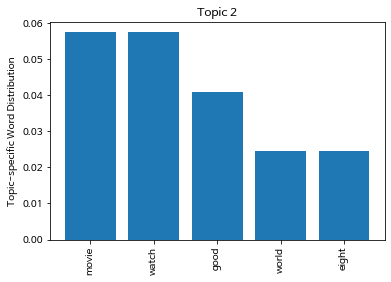

In [ ]:
# 토픽별 단어분포
i = 1    # 토픽 인덱스 (인덱스는 0부터 시작함에 유의, 토픽 1: i=0)
topic_dist = topic_word_dist[i,:]
sorted_topic_dist = np.argsort(topic_dist)
topic_words = np.array(feature_names)[sorted_topic_dist]
topic_words = topic_words[:-n_top_words-1:-1]
print("Topic", str(i+1), topic_words)
plt.bar(topic_words, topic_word_dist[i,sorted_topic_dist][:-n_top_words-1:-1])
plt.xticks(rotation=90)
plt.title("Topic " + str(i+1))
plt.ylabel("Topic-specific Word Distribution")
plt.show()

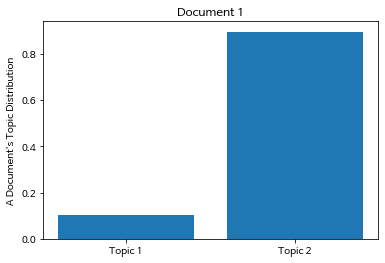

In [ ]:
# 문서별 토픽분포
j = 0    # 문서 인덱스 (인덱스는 0부터 시작함에 유의, 첫번째 문서: j=0)
plt.title("Document " + str(j+1))
plt.bar(['Topic 1', 'Topic 2'], doc_topic_dist[j,:])
plt.ylabel("A Document's Topic Distribution")
plt.show()